In [1]:
import os
from glob import glob
from skimage import data, io, feature, color, exposure
import numpy as np
import cv2

from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

import seaborn as sns
%matplotlib inline

In [2]:
radius = 1
n_points = 8 * radius
grid_X, grid_Y = 16,16
method='uniform'

In [3]:
lfw2_crop = os.path.join('..', 'Data', 'lfw2_cropped')
putin_01 = Path(lfw2_crop, 'Vladimir_Putin', 'Vladimir_Putin_0001.jpg')

In [4]:
img = plt.imread(putin_01)
# numPoints = 24
# radius = 3
# n_points = 8 * radius
# lbp = feature.local_binary_pattern(img, n_points, radius, method="uniform")

FileNotFoundError: [Errno 2] No such file or directory: '/home/bkemmer/projects/custom_cnn/Data/lfw2_cropped/Vladimir_Putin/Vladimir_Putin_0001.jpg'

In [5]:
def criaGrid(img, grid_X, grid_Y, ax, color='r', linestyle='--', linewidth=1):
    w, h = img.shape
    nrows = int(w/grid_X)
    ncols = int(w/grid_X)
    for i in range(1, nrows):
        ax.axhline(y=i*grid_X, xmin=0, xmax=w, color=color, linestyle=linestyle, linewidth=linewidth)
        ax.axvline(x=i*grid_Y, ymin=0, ymax=h, color=color, linestyle=linestyle, linewidth=linewidth) 
    return ax

In [ ]:
fig, ax = plt.subplots(1)
ax.imshow(img, cmap='gray')
criaGrid(img, grid_X, grid_Y, ax, color='r', linestyle='--')

In [ ]:
import itertools
def cartesian_product_itertools(arrays):
    return numpy.array(list(itertools.product(*arrays)))

In [ ]:
def geraPairs(img, grid_X, grid_Y):
    w,h = img.shape
    pairs_x = [(grid_X*i, grid_X*(i+1)) for i in range(int(w/grid_X))]
    pairs_y = [(grid_Y*i, grid_Y*(i+1)) for i in range(int(h/grid_Y))]
    pairs = []
    for pair_y in pairs_y:
        for pair_x in pairs_x:
            pairs.append((pair_x, pair_y))
    print(len(pairs))
    return pairs

In [42]:
def geraHist(img, pairs, n_points, radius, method):
    hists = []
    for pair in pairs:
    #     print(pair)
        section = img[pair[0][0]:pair[0][1], pair[1][0]:pair[1][1]]
        lbp_section = feature.local_binary_pattern(section, n_points, radius, method=method)
        (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
        eps = 1e-6
        # normalize the histogram
    #     hist = hist.astype("float")
    #     hist /= (hist.sum() + eps)
    #     print(hist.shape)
        hists.append(hist)
    return hists

In [43]:
pairs = geraPairs(img, grid_X, grid_Y)
hists = geraHist(img, pairs, n_points, radius, method)
val = np.hstack(hists)

36


NameError: name 'lbp' is not defined

In [44]:
x = range(len(val))
plt.bar(x,val)

<BarContainer object of 9144 artists>

Error in callback <function flush_figures at 0x7f71435c1940> (for post_execute):


KeyboardInterrupt: 

In [12]:
val.shape

(9144,)

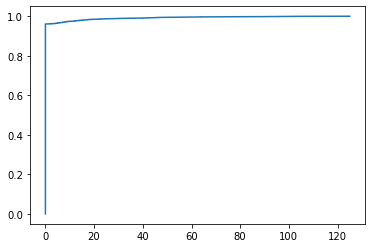

In [13]:
from statsmodels.distributions.empirical_distribution import ECDF
cdf = ECDF(val)
plt.plot(cdf.x, cdf.y, label="statmodels", markerfacecolor='none')

In [14]:
lfw2_crop = os.path.join('..', 'Data', 'lfw2_cropped')
putin_21 = Path(lfw2_crop, 'Vladimir_Putin', 'Vladimir_Putin_0021.jpg')
img21 = plt.imread(putin_21)

<AxesSubplot:>

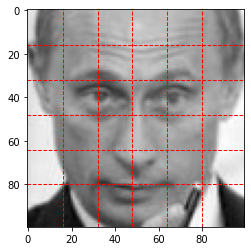

In [15]:
fig, ax = plt.subplots(1)
ax.imshow(img21, cmap='gray')

criaGrid(img21, grid_X, grid_Y, ax, color='r', linestyle='--')

In [16]:
pairs21 = geraPairs(img21, grid_X, grid_Y)
hists21 = geraHist(img21, pairs21, n_points, radius, method)
val21 = np.hstack(hists21)

36


<BarContainer object of 9144 artists>

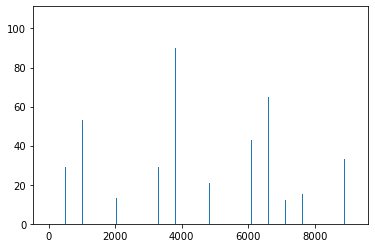

In [17]:
x = range(len(val21))
plt.bar(x,val21)

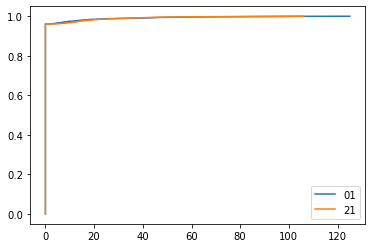

In [18]:
from statsmodels.distributions.empirical_distribution import ECDF
cdf21 = ECDF(val21)
plt.plot(cdf.x, cdf.y, label='01')
plt.plot(cdf21.x, cdf21.y,label='21')
plt.legend()

# testing Aaron Sorkin

In [19]:
lfw2_crop = os.path.join('..', 'Data', 'lfw2_cropped')
aaron = Path(lfw2_crop, 'Aaron_Sorkin', 'Aaron_Sorkin_0001.jpg')
aaron = plt.imread(aaron)

<AxesSubplot:>

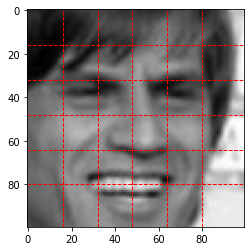

In [20]:
fig, ax = plt.subplots(1)
ax.imshow(aaron, cmap='gray')
criaGrid(aaron, grid_X, grid_Y, ax, color='r', linestyle='--')

In [21]:
pairsAaron = geraPairs(aaron, grid_X, grid_Y)
histsAaron = geraHist(aaron, pairsAaron, n_points, radius, method)
valAaron = np.hstack(histsAaron)

36


<BarContainer object of 9144 artists>

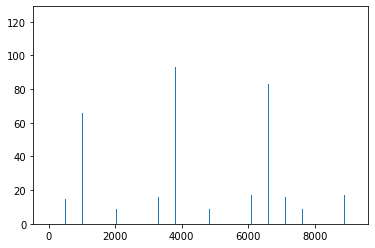

In [22]:
x = range(len(valAaron))
plt.bar(x,valAaron)

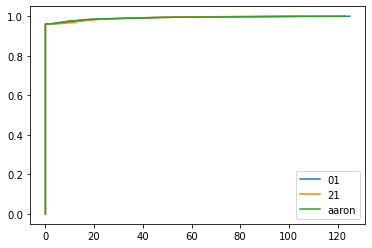

In [23]:
from statsmodels.distributions.empirical_distribution import ECDF
cdfaaronVals = ECDF(valAaron)
plt.plot(cdf.x, cdf.y, label='01')
plt.plot(cdf21.x, cdf21.y, label='21')
plt.plot(cdfaaronVals.x, cdfaaronVals.y, label='aaron')
plt.legend()

In [24]:
# dist = np.linalg.norm(a-b)
A_x, A_y = cdf21.x, cdf21.y
B_x, B_y = cdfaaronVals.x, cdfaaronVals.y
dists = []
for i in range(1,len(A_x)):
    a = np.array(A_x[i], A_y[i])
    b = np.array(B_x[i], B_y[i])
    dists.append(np.linalg.norm(a-b))
np.max(dists)

27.0

In [25]:
# dist = np.linalg.norm(a-b)
A_x, A_y = cdf21.x, cdf21.y
B_x, B_y = cdf.x, cdf.y
dists = []
for i in range(1,len(A_x)):
    a = np.array(A_x[i], A_y[i])
    b = np.array(B_x[i], B_y[i])
    dists.append(np.linalg.norm(a-b))
np.max(dists)

34.0

In [26]:
# dist = np.linalg.norm(a-b)
A_x, A_y = cdfaaronVals.x, cdfaaronVals.y
B_x, B_y = cdf.x, cdf.y
dists = []
for i in range(1,len(A_x)):
    a = np.array(A_x[i], A_y[i])
    b = np.array(B_x[i], B_y[i])
    dists.append(np.linalg.norm(a-b))
np.max(dists)

15.0

# testing Aaron Sorkin 2

In [27]:
lfw2_crop = os.path.join('..', 'Data', 'lfw2_cropped')
aaron2 = Path(lfw2_crop, 'Aaron_Sorkin', 'Aaron_Sorkin_0002.jpg')
aaron2 = plt.imread(aaron2)

<AxesSubplot:>

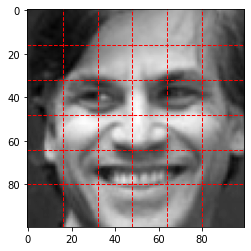

In [28]:
fig, ax = plt.subplots(1)
ax.imshow(aaron2, cmap='gray')
criaGrid(aaron2, grid_X, grid_Y, ax, color='r', linestyle='--')

In [29]:
pairsAaron2 = geraPairs(aaron2, grid_X, grid_Y)
histsAaron2 = geraHist(aaron2, pairsAaron2, n_points, radius, method)
valAaron2 = np.hstack(histsAaron2)

36


<BarContainer object of 9144 artists>

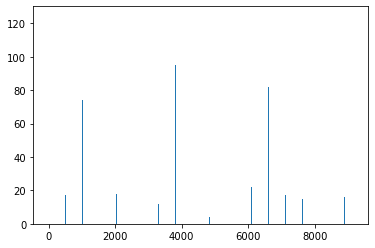

In [30]:
x = range(len(valAaron2))
plt.bar(x,valAaron2)

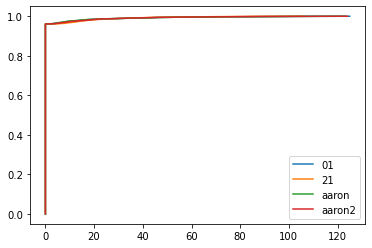

In [31]:
from statsmodels.distributions.empirical_distribution import ECDF
cdfaaronVals2 = ECDF(valAaron2)
plt.plot(cdf.x, cdf.y, label='01')
plt.plot(cdf21.x, cdf21.y, label='21')
plt.plot(cdfaaronVals.x, cdfaaronVals.y, label='aaron')
plt.plot(cdfaaronVals2.x, cdfaaronVals2.y, label='aaron2')
plt.legend()

In [32]:
cdfaaronVals.y

array([0.00000000e+00, 1.09361330e-04, 2.18722660e-04, ...,
       9.99781277e-01, 9.99890639e-01, 1.00000000e+00])

(-1.0, 10.0)

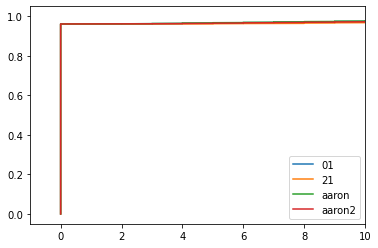

In [33]:
plt.plot(cdf.x, cdf.y, label='01')
plt.plot(cdf21.x, cdf21.y, label='21')
plt.plot(cdfaaronVals.x, cdfaaronVals.y, label='aaron')
plt.plot(cdfaaronVals2.x, cdfaaronVals2.y, label='aaron2')
plt.legend()
plt.xlim(-1,10)

In [34]:
# dist = np.linalg.norm(a-b)
A_x, A_y = cdf21.x, cdf21.y
B_x, B_y = cdfaaronVals.x, cdfaaronVals.y
dists = []
for i in range(1,len(A_x)):
    a = np.array(A_x[i], A_y[i])
    b = np.array(B_x[i], B_y[i])
    dists.append(np.linalg.norm(a-b))
np.max(dists)

27.0

In [35]:
# dist = np.linalg.norm(a-b)
A_x, A_y = cdf21.x, cdf21.y
B_x, B_y = cdf.x, cdf.y
dists = []
for i in range(1,len(A_x)):
    a = np.array(A_x[i], A_y[i])
    b = np.array(B_x[i], B_y[i])
    dists.append(np.linalg.norm(a-b))
np.max(dists)

34.0

In [36]:
# dist = np.linalg.norm(a-b)
A_x, A_y = cdfaaronVals.x, cdfaaronVals.y
B_x, B_y = cdf.x, cdf.y
dists = []
for i in range(1,len(A_x)):
    a = np.array(A_x[i], A_y[i])
    b = np.array(B_x[i], B_y[i])
    dists.append(np.linalg.norm(a-b))
np.max(dists)

15.0

In [37]:
# dist = np.linalg.norm(a-b)
A_x, A_y = cdfaaronVals.x, cdfaaronVals.y
B_x, B_y = cdfaaronVals2.x, cdfaaronVals2.y
dists = []
for i in range(1,len(A_x)):
    a = np.array(A_x[i], A_y[i])
    b = np.array(B_x[i], B_y[i])
    dists.append(np.linalg.norm(a-b))
np.max(dists)

12.0

In [38]:
np.sum(np.abs(valAaron - valAaron2))

2430

In [39]:
np.sum(np.abs(val - val21))

3038

In [40]:
np.sum(np.abs(valAaron - val))

2798

In [41]:
np.sum(np.abs(valAaron - val21))

3482